In [ ]:
%pip install vaderSentiment
%pip install matplotlib
%pip install beautifulsoup4
%pip install ipython
%pip install scikit-learn
%pip install keras
%pip install numpy
%pip install textblob
%pip install nltk

#Sentiment of Original Texts

In [ ]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from IPython.display import Markdown
from bs4 import BeautifulSoup
from IPython.display import display, Markdown


# Data Preparation
response = requests.get("https://www.rocketlawyer.com/business-and-contracts/service-contracts/manufacturing-and-transportation-contracts/document/trucking-contract")
response.encoding = "ISO-8859-1"
text_data = response.text

# Extract the text from the HTML content
soup = BeautifulSoup(text_data, "html.parser")
text = soup.get_text()


# Split the text data into individual documents
documents = text_data.split('\n')
documents = text.split('. ')

# Split the documents into training and testing sets
train_data, test_data = train_test_split(documents, test_size=0.2)

# Split the text into individual sentences
sentences = text.split('. ')

# Text Vectorization with Stop Words
vectorizer = CountVectorizer(stop_words='english')
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

# Define Training Labels
train_labels = [0] * len(train_data)

# Building the RNNs Model
model = Sequential()
model.add(Embedding(input_dim=train_vectors.shape[1], output_dim=100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Training the RNNs Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
train_labels = np.array(train_labels)
model.fit(train_vectors.toarray(), train_labels, epochs=10, batch_size=32)

# Predicting the Polarity
predictions = model.predict(test_vectors.toarray())

# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
sentiment_scores = analyzer.polarity_scores(sentences)
print("Overall Sentiment Score is Positive:",sentiment_scores)

Epoch 1/10
3/3 [==============================] - 8s 1s/step - loss: 0.6727 - accuracy: 0.5672
Epoch 2/10
3/3 [==============================] - 5s 1s/step - loss: 0.5506 - accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 3s 944ms/step - loss: 0.3379 - accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 4s 1s/step - loss: 0.0226 - accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 5s 2s/step - loss: 0.0021 - accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 4s 1s/step - loss: 8.0145e-04 - accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 2s 558ms/step - loss: 4.3084e-04 - accuracy: 1.0000
Epoch 8/10
3/3 [==============================] - 2s 552ms/step - loss: 2.6836e-04 - accuracy: 1.0000
Epoch 9/10
3/3 [==============================] - 2s 542ms/step - loss: 1.8449e-04 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 1s 538ms/step
Overall Sentiment Score is Positive: {'neg': 0.027, 

#Inject Positive Sentences

In [ ]:
# Inject positive sentences and highlight them
positive_sentences = [
    "Trucking contracts provide a reliable and efficient way to transport goods from one location to another, ensuring timely delivery and customer satisfaction",
    "By entering into a trucking contract, businesses can focus on their core operations while leaving the logistics and transportation responsibilities to experienced professionals",
    "Trucking contracts offer cost-effective solutions for businesses, as they eliminate the need for companies to invest in their own fleet of trucks and hire drivers",
    "With a well-structured trucking contract, businesses can enjoy the benefits of scalability, allowing them to easily adjust their transportation needs based on demand fluctuations."

]

# highlighted_text = ""
# for i, sentence in enumerate(sentences):
#     if i < len(positive_sentences):
#         # Inject positive sentence
#         highlighted_sentence = f"**{positive_sentences[i]}**"
#         highlighted_text += highlighted_sentence + ". "
#     highlighted_text += sentence + ". "

# # Display the modified text with highlighted positive sentences
# display(Markdown(highlighted_text))

highlighted_text = ""
highlighted_sentences = []

for i, sentence in enumerate(sentences):
    if i < len(positive_sentences):
        # Inject positive sentence
        highlighted_sentence = f"**{positive_sentences[i]}**"
        highlighted_sentences.append(highlighted_sentence)
    highlighted_sentences.append(sentence)

highlighted_sentences.sort()
highlighted_text = ". ".join(highlighted_sentences)

# Display the modified text with highlighted positive sentences
display(Markdown(highlighted_text))



sentiment_scores = analyzer.polarity_scores(positive_sentences)

print("Overall Sentiment Score is Positive:",sentiment_scores)
print('-' * 50)

































. 






Free Trucking Contract Template & FAQs - Rocket Lawyer




























































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Business and contracts



⌃


Service contracts






⌃


Manufacturing and transportation contracts













MAKE YOUR FREE Trucking Contract


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Trucking Contract
            


Make document                    



 







What is a Trucking Contract?
Trucking carriers and their clients often use Trucking Contracts as a means of laying out the scope and payment terms for their business relationship with a manufacturer or distributor of goods. 




Back to top



Back to top






Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save, print & share
Save progress and finish on any device, download & print anytime






Sign & make it legal
Securely sign online and invite others to sign







Related documents
Rocket Lawyer members who started a free Trucking Contract also made:





Manufacturing Contract
Establish an agreement for manufacturing a product







Fulfillment Services Agreement
Set scope of work and payment terms







Transportation Contract
Set terms for transportation services







Fuel Supply Agreement
Set terms for a contract to supply fuel






                    Explore other Business and contracts documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Trucking Contract now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. 



How much would I usually need to pay to get a trucking contract template from a lawyer?





The fees associated with meeting with and hiring a traditional attorney could add up to anywhere from hundreds of dollars to thousands, if your matter is complex. 



What are my next steps after a Hauling Contract is drafted?





In order to turn this document into a true legal contract, you and the cargo owner will need to sign it, electronically or otherwise. 



What information should I cover in a contract for trucking?





You might want to prepare the following details for the Trucking Contract:Name and address of your clientWhat work you will be performing once hiredHow much it will cost and when payment is dueHow long the engagement will lastAs you might hope with an agreement like this, your Trucking Contract will also include the typical language with regard to the non-employer relationship between the carrier and cargo owner, confidentiality, indemnification, and finally, dispute resolution. 



Where can I have my Trucking Agreement reviewed by a lawyer?





If you try it by yourself, getting a lawyer to provide feedback on contracts could be expensive.                  b.                  c.                  d.         REMEDIES.  shall be liable to  for cargo claims occurring while in the possession of or under the control of , relating to or arising out of 's solely negligent performance of this Contract.  shall not deduct or offset any cargo claims from the freight charges owed to .  will not provide fringe benefits, including health insurance benefits, paid vacation, or any other employee benefit, for the benefit of .      DESCRIPTION OF SERVICES.      ENTIRE AGREEMENT.      RELATIONSHIP OF PARTIES.      TERM/TERMINATION.     shall be responsible for the safe and lawful operation of the vehicles used in the performance of the transportation contemplated by this Contract.     shall not be liable for any economic loss or consequential damages to  beyond actual loss.     will pay compensation to  for the Services in accordance with Schedule A or any modification thereof upon completion of the Services.    , or other labor disputes, or supplier failures  AMENDMENT.    APPLICABLE LAW.    FREIGHT LOSS OR DAMAGE.    Upon termination of this Contract,  will return to  all records, notes, documentation and other items that were used, created, or controlled by  during the term of this Contract. **By entering into a trucking contract, businesses can focus on their core operations while leaving the logistics and transportation responsibilities to experienced professionals**. **Trucking contracts offer cost-effective solutions for businesses, as they eliminate the need for companies to invest in their own fleet of trucks and hire drivers**. **Trucking contracts provide a reliable and efficient way to transport goods from one location to another, ensuring timely delivery and customer satisfaction**. **With a well-structured trucking contract, businesses can enjoy the benefits of scalability, allowing them to easily adjust their transportation needs based on demand fluctuations.**. Also feel free to browse our repository of legal documents for contractors and service providers . An easier and more cost-effective alternative is through attorney services at Rocket Lawyer. Any cargo claim shall be made by  by submitting a written notice of the claim within  days of the delivery date of the shipment or if no delivery, the date of the occurrence resulting in the claim. Any notice or communication required or permitted under this Contract shall be sufficiently given if delivered in person or by certified mail, return receipt requested, to the address set forth in the opening paragraph or to such other address as one party may have furnished to the other in writing. As a Rocket Lawyer member, you may opt to activate Document Defense®, which enables an attorney to help you demand payment or otherwise enforce your legal rights.
When to use a Trucking Contract:
You're providing transportation or trucking services for a company as an independent contractor.You're hiring a carrier or a trucker to provide transportation services to your company.





Sample Trucking Contract
The terms in your document will update based on the information you provide





This document has been customized over 51.1K times



Legally binding and enforceable



Ask a lawyer questions about your document



Sign this document online for free with RocketSignÂ®




Expand 


    Trucking Contract     This Trucking Contract (this "Contract") is made effective as of , by and between , of , ,  , and , of , ,  . As a result of this agreement, all signers will know what to expect from the trucking services. Be sure that all signers get a copy of the fully executed contract. Beginning on ,  will provide interstate and intrastate transportation services including the following services (collectively, the "Services"):       RATES, CHARGES AND PAYMENT FOR SERVICES. By mutual consent Schedule "A" may be modified, if the modification is in writing and signed by both parties. Certain lawyers may not even agree to review a document that they didn't author. Each shipment hereunder shall be evidenced by and subject to the terms, conditions and provisions of a bill of lading, or other proof of delivery receipt. If a court finds that any provision of this Agreement is invalid or unenforceable, but that by limiting such provision it would become valid and enforceable, then such provision shall be deemed to be written, construed, and enforced as so limited. If any provision of this Agreement shall be held to be invalid or unenforceable for any reason, the remaining provisions shall continue to be valid and enforceable. In addition to any and all other rights a party may have available according to law, if a party defaults by failing to substantially perform any provision, term or condition of this Contract (including without limitation the failure to make a monetary payment when due), the other party may terminate the Contract by providing written notice to the defaulting party. In the event of conflict between the terms, conditions and provisions of such bill of lading or receipts and this Contract, the provisions of this Contract shall govern. In the event that an attorney does decide to help, they are still going to demand their standard fees to do so. It is understood by the parties that  is an independent contractor with respect to , and not an employee of . Once you have generated your document, you should always consider having your draft looked at by an attorney in our nationwide On Call network.If you have any particular doubts or questions about how to move forward, connect with an attorney . Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. Simply tap or click on the button labeled "Make document" to begin the process. The claim that is not timely filed shall be barred and  shall have no liability for the loss alleged. The failure to make a required payment when due. The failure to make available or deliver the Services in the time and manner provided for in this Contract. The insolvency or bankruptcy of either party. The occurrence of any of the following shall constitute a material default under this Contract:              a. The parties agree that signatures on this Contract, as well as any other documents to be executed under this Contract, may be delivered by facsimile in lieu of an original signature, and the parties agree to treat facsimile signatures as original signatures and agree to be bound by this provision. The party receiving such notice shall have  days from the effective date of such notice to cure the default(s). The provisions of this section shall survive the cancellation, termination or expiration of this Contract. The rates and charges as stated in Schedule "A" shall remain in effect for the term of this Contract unless the Parties agree in writing to their modification. The rates and charges for the truck transportation services contemplated by this Contract shall be as stated in Schedule "A" attached to this Contract. The subjection of any of either party's property to any levy, seizure, general assignment for the benefit of creditors, application or sale for or by any creditor or government agency. This Agreement      ALL SHIPMENTS UNDER CONTRACT. This Agreement shall be governed by the laws of the State of . This Agreement shall be signed on behalf of  by ,and on behalf of  by . This Contract contains the entire Contract of the parties, and there are no other promises or conditions in any other Contract whether oral or written. This Contract may be executed simultaneously in one or more counterparts, each of which shall be deemed to be an original, but all of which together shall constitute one and the same instrument. This Contract may be modified or amended in writing, if the writing is signed by the party obligated under the amendment. This compensation shall be payable in a lump sum upon completion of each job under this Contract. This notice shall describe with sufficient detail the nature of the default. Unless waived by a party providing notice, the failure to cure the default(s) within such time period shall result in the automatic termination of this Contract. When you use Rocket Lawyer, every Trucking Contract that you make can be tailored to you. Whether or not  is authorized to or does operate as a common motor carrier, each and every shipment tendered by  to  on or after the date of this Contract shall be deemed to be a tender to  as a motor contract carrier and shall be subject only to the terms of this Contract and the provisions of law applicable to motor contract carriers. Whether you decide to produce another Trucking Agreement or other legal documents for your business, we'll be here for you. While making your agreement, you also can pick which state's jurisdiction it will be subject to. With a Premium membership, you can have your contracts examined by an experienced contracts attorney. With a Rocket Lawyer membership, you also may print out, make copies, and/or download it when needed. With the document tool, you are able to add more custom alterations, if needed. You can use RocketSign® to collect signatures electronically. You may choose to make a Trucking Contract due to the fact that it yields the following list of benefits:The length of the engagement is agreed uponBoth the truck driver and the client understand their responsibilitiesBoth parties know when billing will happenUltimately, if you and/or the client decide against signing a Trucking Agreement, you might not receive any of the protections connected to having one in place. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top














































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals.     COUNTERPARTS.         PARTY CONTRACTING SERVICES:               By:   Date:              CARRIER:               By:   Date:                   SCHEDULE A   Rates and Charges      Services Provided                     Mileage                    




 







Trucking Contract FAQs








Collapse all

|






Expand all







Why would I use a Hauling Contract?





Regardless of the type of work you will do as a commercial trucker, a Trucking Contract is always recommended.    DEFAULT.    shall be responsible for the procuring and operating the vehicles and the employment, hiring, training, supervising and controlling its drivers and helpers.   BILLS OF LADING.   NOTICE.   SEVERABILITY.   SIGNATURES

Overall Sentiment Score is Positive: {'neg': 0.015, 'neu': 0.837, 'pos': 0.148, 'compound': 0.9062}
--------------------------------------------------


#Inject Negative Sentences

In [ ]:
negative_sentences = [
    "The trucking contract lacked clear provisions for liability, leaving both parties vulnerable to potential disputes and legal complications",
    "The trucking contract failed to include a penalty clause for late deliveries, resulting in frequent delays and disruptions to our supply chain",
    "The contract did not specify the required maintenance standards for the trucks, leading to frequent breakdowns and increased downtime",
    "The trucking contract did not outline a clear process for handling cargo damage claims, resulting in lengthy and frustrating resolution procedures"

]
highlighted_text_negative = ""
for i, sentence in enumerate(sentences):
  if i < len(negative_sentences):
    # Inject negative sentence
    highlighted_sentence_negative = f"**{negative_sentences[i]}**"
    highlighted_text_negative += highlighted_sentence_negative + ". "
  highlighted_text_negative += sentence + ". "

# Display the modified text with highlighted negative sentences
display(Markdown(highlighted_text_negative))

negative_sentiment_scores = analyzer.polarity_scores(negative_sentences)
negative_sentiment_scores['neg'] *= -1
negative_sentiment_scores['compound'] *= 1

# Determine if overall sentiment is negative
overall_sentiment_scores = analyzer.polarity_scores(text)
if overall_sentiment_scores['neg'] < overall_sentiment_scores['pos']:
    print("Overall Sentiment Score is Negative:", negative_sentiment_scores)
print('-' * 50)


**The trucking contract lacked clear provisions for liability, leaving both parties vulnerable to potential disputes and legal complications**. 






Free Trucking Contract Template & FAQs - Rocket Lawyer




























































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Business and contracts



⌃


Service contracts






⌃


Manufacturing and transportation contracts













MAKE YOUR FREE Trucking Contract


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Trucking Contract
            


Make document                    



 







What is a Trucking Contract?
Trucking carriers and their clients often use Trucking Contracts as a means of laying out the scope and payment terms for their business relationship with a manufacturer or distributor of goods. **The trucking contract failed to include a penalty clause for late deliveries, resulting in frequent delays and disruptions to our supply chain**. As a result of this agreement, all signers will know what to expect from the trucking services. **The contract did not specify the required maintenance standards for the trucks, leading to frequent breakdowns and increased downtime**. As a Rocket Lawyer member, you may opt to activate Document Defense®, which enables an attorney to help you demand payment or otherwise enforce your legal rights.
When to use a Trucking Contract:
You're providing transportation or trucking services for a company as an independent contractor.You're hiring a carrier or a trucker to provide transportation services to your company.





Sample Trucking Contract
The terms in your document will update based on the information you provide





This document has been customized over 51.1K times



Legally binding and enforceable



Ask a lawyer questions about your document



Sign this document online for free with RocketSignÂ®




Expand 


    Trucking Contract     This Trucking Contract (this "Contract") is made effective as of , by and between , of , ,  , and , of , ,  . **The trucking contract did not outline a clear process for handling cargo damage claims, resulting in lengthy and frustrating resolution procedures**.      DESCRIPTION OF SERVICES. Beginning on ,  will provide interstate and intrastate transportation services including the following services (collectively, the "Services"):       RATES, CHARGES AND PAYMENT FOR SERVICES. The rates and charges for the truck transportation services contemplated by this Contract shall be as stated in Schedule "A" attached to this Contract. The rates and charges as stated in Schedule "A" shall remain in effect for the term of this Contract unless the Parties agree in writing to their modification. By mutual consent Schedule "A" may be modified, if the modification is in writing and signed by both parties.     will pay compensation to  for the Services in accordance with Schedule A or any modification thereof upon completion of the Services. This compensation shall be payable in a lump sum upon completion of each job under this Contract.      TERM/TERMINATION. This Agreement      ALL SHIPMENTS UNDER CONTRACT. Whether or not  is authorized to or does operate as a common motor carrier, each and every shipment tendered by  to  on or after the date of this Contract shall be deemed to be a tender to  as a motor contract carrier and shall be subject only to the terms of this Contract and the provisions of law applicable to motor contract carriers.   BILLS OF LADING. Each shipment hereunder shall be evidenced by and subject to the terms, conditions and provisions of a bill of lading, or other proof of delivery receipt. In the event of conflict between the terms, conditions and provisions of such bill of lading or receipts and this Contract, the provisions of this Contract shall govern.    FREIGHT LOSS OR DAMAGE. Any cargo claim shall be made by  by submitting a written notice of the claim within  days of the delivery date of the shipment or if no delivery, the date of the occurrence resulting in the claim.  shall be liable to  for cargo claims occurring while in the possession of or under the control of , relating to or arising out of 's solely negligent performance of this Contract. The claim that is not timely filed shall be barred and  shall have no liability for the loss alleged.     shall not be liable for any economic loss or consequential damages to  beyond actual loss.  shall not deduct or offset any cargo claims from the freight charges owed to . The provisions of this section shall survive the cancellation, termination or expiration of this Contract.      RELATIONSHIP OF PARTIES. It is understood by the parties that  is an independent contractor with respect to , and not an employee of .  will not provide fringe benefits, including health insurance benefits, paid vacation, or any other employee benefit, for the benefit of .    shall be responsible for the procuring and operating the vehicles and the employment, hiring, training, supervising and controlling its drivers and helpers.     shall be responsible for the safe and lawful operation of the vehicles used in the performance of the transportation contemplated by this Contract.    Upon termination of this Contract,  will return to  all records, notes, documentation and other items that were used, created, or controlled by  during the term of this Contract.    DEFAULT. The occurrence of any of the following shall constitute a material default under this Contract:              a. The failure to make a required payment when due.                  b. The insolvency or bankruptcy of either party.                  c. The subjection of any of either party's property to any levy, seizure, general assignment for the benefit of creditors, application or sale for or by any creditor or government agency.                  d. The failure to make available or deliver the Services in the time and manner provided for in this Contract.         REMEDIES. In addition to any and all other rights a party may have available according to law, if a party defaults by failing to substantially perform any provision, term or condition of this Contract (including without limitation the failure to make a monetary payment when due), the other party may terminate the Contract by providing written notice to the defaulting party. This notice shall describe with sufficient detail the nature of the default. The party receiving such notice shall have  days from the effective date of such notice to cure the default(s). Unless waived by a party providing notice, the failure to cure the default(s) within such time period shall result in the automatic termination of this Contract.    , or other labor disputes, or supplier failures  AMENDMENT. This Contract may be modified or amended in writing, if the writing is signed by the party obligated under the amendment.     COUNTERPARTS. This Contract may be executed simultaneously in one or more counterparts, each of which shall be deemed to be an original, but all of which together shall constitute one and the same instrument. The parties agree that signatures on this Contract, as well as any other documents to be executed under this Contract, may be delivered by facsimile in lieu of an original signature, and the parties agree to treat facsimile signatures as original signatures and agree to be bound by this provision.      ENTIRE AGREEMENT. This Contract contains the entire Contract of the parties, and there are no other promises or conditions in any other Contract whether oral or written.   SEVERABILITY. If any provision of this Agreement shall be held to be invalid or unenforceable for any reason, the remaining provisions shall continue to be valid and enforceable. If a court finds that any provision of this Agreement is invalid or unenforceable, but that by limiting such provision it would become valid and enforceable, then such provision shall be deemed to be written, construed, and enforced as so limited.   NOTICE. Any notice or communication required or permitted under this Contract shall be sufficiently given if delivered in person or by certified mail, return receipt requested, to the address set forth in the opening paragraph or to such other address as one party may have furnished to the other in writing.    APPLICABLE LAW. This Agreement shall be governed by the laws of the State of .   SIGNATURES. This Agreement shall be signed on behalf of  by ,and on behalf of  by .         PARTY CONTRACTING SERVICES:               By:   Date:              CARRIER:               By:   Date:                   SCHEDULE A   Rates and Charges      Services Provided                     Mileage                    




 







Trucking Contract FAQs








Collapse all

|






Expand all







Why would I use a Hauling Contract?





Regardless of the type of work you will do as a commercial trucker, a Trucking Contract is always recommended. You may choose to make a Trucking Contract due to the fact that it yields the following list of benefits:The length of the engagement is agreed uponBoth the truck driver and the client understand their responsibilitiesBoth parties know when billing will happenUltimately, if you and/or the client decide against signing a Trucking Agreement, you might not receive any of the protections connected to having one in place. 



What information should I cover in a contract for trucking?





You might want to prepare the following details for the Trucking Contract:Name and address of your clientWhat work you will be performing once hiredHow much it will cost and when payment is dueHow long the engagement will lastAs you might hope with an agreement like this, your Trucking Contract will also include the typical language with regard to the non-employer relationship between the carrier and cargo owner, confidentiality, indemnification, and finally, dispute resolution. While making your agreement, you also can pick which state's jurisdiction it will be subject to. With the document tool, you are able to add more custom alterations, if needed. 



How much would I usually need to pay to get a trucking contract template from a lawyer?





The fees associated with meeting with and hiring a traditional attorney could add up to anywhere from hundreds of dollars to thousands, if your matter is complex. When you use Rocket Lawyer, every Trucking Contract that you make can be tailored to you. Simply tap or click on the button labeled "Make document" to begin the process. Once you have generated your document, you should always consider having your draft looked at by an attorney in our nationwide On Call network.If you have any particular doubts or questions about how to move forward, connect with an attorney . Also feel free to browse our repository of legal documents for contractors and service providers . 



What are my next steps after a Hauling Contract is drafted?





In order to turn this document into a true legal contract, you and the cargo owner will need to sign it, electronically or otherwise. You can use RocketSign® to collect signatures electronically. Be sure that all signers get a copy of the fully executed contract. With a Rocket Lawyer membership, you also may print out, make copies, and/or download it when needed. 



Where can I have my Trucking Agreement reviewed by a lawyer?





If you try it by yourself, getting a lawyer to provide feedback on contracts could be expensive. Certain lawyers may not even agree to review a document that they didn't author. In the event that an attorney does decide to help, they are still going to demand their standard fees to do so. An easier and more cost-effective alternative is through attorney services at Rocket Lawyer. With a Premium membership, you can have your contracts examined by an experienced contracts attorney. Whether you decide to produce another Trucking Agreement or other legal documents for your business, we'll be here for you. 




Back to top



Back to top






Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save, print & share
Save progress and finish on any device, download & print anytime






Sign & make it legal
Securely sign online and invite others to sign







Related documents
Rocket Lawyer members who started a free Trucking Contract also made:





Manufacturing Contract
Establish an agreement for manufacturing a product







Fulfillment Services Agreement
Set scope of work and payment terms







Transportation Contract
Set terms for transportation services







Fuel Supply Agreement
Set terms for a contract to supply fuel






                    Explore other Business and contracts documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Trucking Contract now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top














































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. 





























. 

Overall Sentiment Score is Negative: {'neg': -0.238, 'neu': 0.669, 'pos': 0.093, 'compound': -0.9167}
--------------------------------------------------


#Comparison Between Results

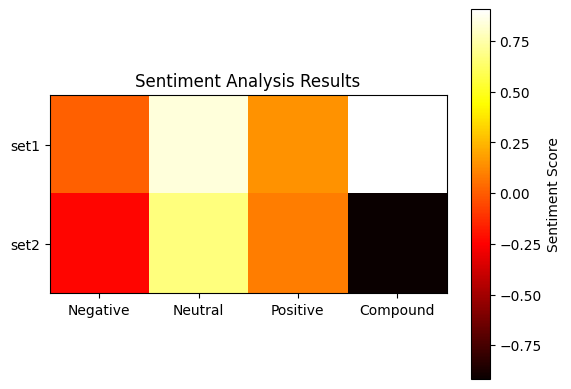

     neg    neu    pos  compound
0  0.015  0.837  0.148    0.9062
1 -0.238  0.669  0.093   -0.9167


In [ ]:
#Create Heatmap for the results
opposite_sentiment_scores = np.array([[0.015 , 0.837 , 0.148 , 0.9062],[-0.238, 0.669, 0.093, -0.9167]])
texts = ['set1', 'set2']
sentiments = ['Negative', 'Neutral', 'Positive', 'Compound']

plt.imshow(opposite_sentiment_scores, cmap='hot', interpolation='nearest')
plt.colorbar(label='Sentiment Score')
plt.xticks(np.arange(len(sentiments)), sentiments)
plt.yticks(np.arange(len(texts)), texts)
plt.title('Sentiment Analysis Results')
plt.show()

import pandas as pd
# Sample sentiment scores
sentiment_scores = [
    [0.015 , 0.837 , 0.148 , 0.9062],
    [-0.238, 0.669, 0.093, -0.9167]
]

# Create a dataframe to store the sentiment analysis data
sentiment_df = pd.DataFrame(sentiment_scores, columns=['neg', 'neu', 'pos', 'compound'])

# Display the dataframe
print(sentiment_df)

#Sort sentences and Inject more Positive Sentences

In [ ]:
# Inject positive sentences and highlight them
positive_sentences = [
    "Trucking contracts provide a reliable and efficient way to transport goods from one location to another, ensuring timely delivery and customer satisfaction",
    "By entering into a trucking contract, businesses can focus on their core operations while leaving the logistics and transportation responsibilities to experienced professionals",
    "Trucking contracts offer cost-effective solutions for businesses, as they eliminate the need for companies to invest in their own fleet of trucks and hire drivers",
    "With a well-structured trucking contract, businesses can enjoy the benefits of scalability, allowing them to easily adjust their transportation needs based on demand fluctuations.",
    "Trucking contracts provide peace of mind to businesses, as they ensure that their goods are being transported by licensed and insured carriers who adhere to industry regulations and safety standards",
    "By partnering with reputable trucking companies through contracts, businesses can tap into their extensive network and benefit from their expertise in route planning, load optimization, and efficient delivery"
]

highlighted_text = ""
highlighted_sentences = []

for i, sentence in enumerate(sentences):
    if i < len(positive_sentences):
        # Inject positive sentence
        highlighted_sentence = f"**{positive_sentences[i]}**"
        highlighted_sentences.append(highlighted_sentence)
    highlighted_sentences.append(sentence)

highlighted_sentences.sort()
highlighted_text = ". ".join(highlighted_sentences)

# Display the modified text with highlighted positive sentences
display(Markdown(highlighted_text))



sentiment_scores = analyzer.polarity_scores(positive_sentences)

print("Overall Sentiment Score is Positive:",sentiment_scores)
print('-' * 50)

































. 






Free Trucking Contract Template & FAQs - Rocket Lawyer




























































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Business and contracts



⌃


Service contracts






⌃


Manufacturing and transportation contracts













MAKE YOUR FREE Trucking Contract


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Trucking Contract
            


Make document                    



 







What is a Trucking Contract?
Trucking carriers and their clients often use Trucking Contracts as a means of laying out the scope and payment terms for their business relationship with a manufacturer or distributor of goods. 




Back to top



Back to top






Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save, print & share
Save progress and finish on any device, download & print anytime






Sign & make it legal
Securely sign online and invite others to sign







Related documents
Rocket Lawyer members who started a free Trucking Contract also made:





Manufacturing Contract
Establish an agreement for manufacturing a product







Fulfillment Services Agreement
Set scope of work and payment terms







Transportation Contract
Set terms for transportation services







Fuel Supply Agreement
Set terms for a contract to supply fuel






                    Explore other Business and contracts documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Trucking Contract now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. 



How much would I usually need to pay to get a trucking contract template from a lawyer?





The fees associated with meeting with and hiring a traditional attorney could add up to anywhere from hundreds of dollars to thousands, if your matter is complex. 



What are my next steps after a Hauling Contract is drafted?





In order to turn this document into a true legal contract, you and the cargo owner will need to sign it, electronically or otherwise. 



What information should I cover in a contract for trucking?





You might want to prepare the following details for the Trucking Contract:Name and address of your clientWhat work you will be performing once hiredHow much it will cost and when payment is dueHow long the engagement will lastAs you might hope with an agreement like this, your Trucking Contract will also include the typical language with regard to the non-employer relationship between the carrier and cargo owner, confidentiality, indemnification, and finally, dispute resolution. 



Where can I have my Trucking Agreement reviewed by a lawyer?





If you try it by yourself, getting a lawyer to provide feedback on contracts could be expensive.                  b.                  c.                  d.         REMEDIES.  shall be liable to  for cargo claims occurring while in the possession of or under the control of , relating to or arising out of 's solely negligent performance of this Contract.  shall not deduct or offset any cargo claims from the freight charges owed to .  will not provide fringe benefits, including health insurance benefits, paid vacation, or any other employee benefit, for the benefit of .      DESCRIPTION OF SERVICES.      ENTIRE AGREEMENT.      RELATIONSHIP OF PARTIES.      TERM/TERMINATION.     shall be responsible for the safe and lawful operation of the vehicles used in the performance of the transportation contemplated by this Contract.     shall not be liable for any economic loss or consequential damages to  beyond actual loss.     will pay compensation to  for the Services in accordance with Schedule A or any modification thereof upon completion of the Services.    , or other labor disputes, or supplier failures  AMENDMENT.    APPLICABLE LAW.    FREIGHT LOSS OR DAMAGE.    Upon termination of this Contract,  will return to  all records, notes, documentation and other items that were used, created, or controlled by  during the term of this Contract. **By entering into a trucking contract, businesses can focus on their core operations while leaving the logistics and transportation responsibilities to experienced professionals**. **By partnering with reputable trucking companies through contracts, businesses can tap into their extensive network and benefit from their expertise in route planning, load optimization, and efficient delivery**. **Trucking contracts offer cost-effective solutions for businesses, as they eliminate the need for companies to invest in their own fleet of trucks and hire drivers**. **Trucking contracts provide a reliable and efficient way to transport goods from one location to another, ensuring timely delivery and customer satisfaction**. **Trucking contracts provide peace of mind to businesses, as they ensure that their goods are being transported by licensed and insured carriers who adhere to industry regulations and safety standards**. **With a well-structured trucking contract, businesses can enjoy the benefits of scalability, allowing them to easily adjust their transportation needs based on demand fluctuations.**. Also feel free to browse our repository of legal documents for contractors and service providers . An easier and more cost-effective alternative is through attorney services at Rocket Lawyer. Any cargo claim shall be made by  by submitting a written notice of the claim within  days of the delivery date of the shipment or if no delivery, the date of the occurrence resulting in the claim. Any notice or communication required or permitted under this Contract shall be sufficiently given if delivered in person or by certified mail, return receipt requested, to the address set forth in the opening paragraph or to such other address as one party may have furnished to the other in writing. As a Rocket Lawyer member, you may opt to activate Document Defense®, which enables an attorney to help you demand payment or otherwise enforce your legal rights.
When to use a Trucking Contract:
You're providing transportation or trucking services for a company as an independent contractor.You're hiring a carrier or a trucker to provide transportation services to your company.





Sample Trucking Contract
The terms in your document will update based on the information you provide





This document has been customized over 51.1K times



Legally binding and enforceable



Ask a lawyer questions about your document



Sign this document online for free with RocketSignÂ®




Expand 


    Trucking Contract     This Trucking Contract (this "Contract") is made effective as of , by and between , of , ,  , and , of , ,  . As a result of this agreement, all signers will know what to expect from the trucking services. Be sure that all signers get a copy of the fully executed contract. Beginning on ,  will provide interstate and intrastate transportation services including the following services (collectively, the "Services"):       RATES, CHARGES AND PAYMENT FOR SERVICES. By mutual consent Schedule "A" may be modified, if the modification is in writing and signed by both parties. Certain lawyers may not even agree to review a document that they didn't author. Each shipment hereunder shall be evidenced by and subject to the terms, conditions and provisions of a bill of lading, or other proof of delivery receipt. If a court finds that any provision of this Agreement is invalid or unenforceable, but that by limiting such provision it would become valid and enforceable, then such provision shall be deemed to be written, construed, and enforced as so limited. If any provision of this Agreement shall be held to be invalid or unenforceable for any reason, the remaining provisions shall continue to be valid and enforceable. In addition to any and all other rights a party may have available according to law, if a party defaults by failing to substantially perform any provision, term or condition of this Contract (including without limitation the failure to make a monetary payment when due), the other party may terminate the Contract by providing written notice to the defaulting party. In the event of conflict between the terms, conditions and provisions of such bill of lading or receipts and this Contract, the provisions of this Contract shall govern. In the event that an attorney does decide to help, they are still going to demand their standard fees to do so. It is understood by the parties that  is an independent contractor with respect to , and not an employee of . Once you have generated your document, you should always consider having your draft looked at by an attorney in our nationwide On Call network.If you have any particular doubts or questions about how to move forward, connect with an attorney . Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. Simply tap or click on the button labeled "Make document" to begin the process. The claim that is not timely filed shall be barred and  shall have no liability for the loss alleged. The failure to make a required payment when due. The failure to make available or deliver the Services in the time and manner provided for in this Contract. The insolvency or bankruptcy of either party. The occurrence of any of the following shall constitute a material default under this Contract:              a. The parties agree that signatures on this Contract, as well as any other documents to be executed under this Contract, may be delivered by facsimile in lieu of an original signature, and the parties agree to treat facsimile signatures as original signatures and agree to be bound by this provision. The party receiving such notice shall have  days from the effective date of such notice to cure the default(s). The provisions of this section shall survive the cancellation, termination or expiration of this Contract. The rates and charges as stated in Schedule "A" shall remain in effect for the term of this Contract unless the Parties agree in writing to their modification. The rates and charges for the truck transportation services contemplated by this Contract shall be as stated in Schedule "A" attached to this Contract. The subjection of any of either party's property to any levy, seizure, general assignment for the benefit of creditors, application or sale for or by any creditor or government agency. This Agreement      ALL SHIPMENTS UNDER CONTRACT. This Agreement shall be governed by the laws of the State of . This Agreement shall be signed on behalf of  by ,and on behalf of  by . This Contract contains the entire Contract of the parties, and there are no other promises or conditions in any other Contract whether oral or written. This Contract may be executed simultaneously in one or more counterparts, each of which shall be deemed to be an original, but all of which together shall constitute one and the same instrument. This Contract may be modified or amended in writing, if the writing is signed by the party obligated under the amendment. This compensation shall be payable in a lump sum upon completion of each job under this Contract. This notice shall describe with sufficient detail the nature of the default. Unless waived by a party providing notice, the failure to cure the default(s) within such time period shall result in the automatic termination of this Contract. When you use Rocket Lawyer, every Trucking Contract that you make can be tailored to you. Whether or not  is authorized to or does operate as a common motor carrier, each and every shipment tendered by  to  on or after the date of this Contract shall be deemed to be a tender to  as a motor contract carrier and shall be subject only to the terms of this Contract and the provisions of law applicable to motor contract carriers. Whether you decide to produce another Trucking Agreement or other legal documents for your business, we'll be here for you. While making your agreement, you also can pick which state's jurisdiction it will be subject to. With a Premium membership, you can have your contracts examined by an experienced contracts attorney. With a Rocket Lawyer membership, you also may print out, make copies, and/or download it when needed. With the document tool, you are able to add more custom alterations, if needed. You can use RocketSign® to collect signatures electronically. You may choose to make a Trucking Contract due to the fact that it yields the following list of benefits:The length of the engagement is agreed uponBoth the truck driver and the client understand their responsibilitiesBoth parties know when billing will happenUltimately, if you and/or the client decide against signing a Trucking Agreement, you might not receive any of the protections connected to having one in place. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top














































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals.     COUNTERPARTS.         PARTY CONTRACTING SERVICES:               By:   Date:              CARRIER:               By:   Date:                   SCHEDULE A   Rates and Charges      Services Provided                     Mileage                    




 







Trucking Contract FAQs








Collapse all

|






Expand all







Why would I use a Hauling Contract?





Regardless of the type of work you will do as a commercial trucker, a Trucking Contract is always recommended.    DEFAULT.    shall be responsible for the procuring and operating the vehicles and the employment, hiring, training, supervising and controlling its drivers and helpers.   BILLS OF LADING.   NOTICE.   SEVERABILITY.   SIGNATURES

Overall Sentiment Score is Positive: {'neg': 0.009, 'neu': 0.8, 'pos': 0.192, 'compound': 0.981}
--------------------------------------------------


#Sort sentences and Inject more Negative sentences

In [ ]:
negative_sentences = [
    "The trucking contract lacked clear provisions for liability, leaving both parties vulnerable to potential disputes and legal complications",
    "The trucking contract failed to include a penalty clause for late deliveries, resulting in frequent delays and disruptions to our supply chain",
    "The contract did not specify the required maintenance standards for the trucks, leading to frequent breakdowns and increased downtime",
    "The trucking contract did not outline a clear process for handling cargo damage claims, resulting in lengthy and frustrating resolution procedures",
    "The contract did not include provisions for regular performance evaluations, making it difficult to hold the trucking company accountable for subpar service",
    "The contract did not address the issue of fuel price fluctuations, leaving us exposed to unexpected cost increases and budgetary challenges"
]

highlighted_text_negative = ""
for i, sentence in enumerate(sentences):
    if i < len(negative_sentences):
        # Inject negative sentence
        highlighted_sentence_negative = f"**{negative_sentences[i]}**"
        highlighted_text_negative += highlighted_sentence_negative + ". "
    highlighted_text_negative += sentence + ". "

highlighted_text_negative = highlighted_text_negative.split('. ')
highlighted_text_negative.sort()
highlighted_text_negative = '. '.join(highlighted_text_negative)
# Display the modified text with highlighted negative sentences
display(Markdown(highlighted_text_negative))

negative_sentiment_scores = analyzer.polarity_scores(negative_sentences)
negative_sentiment_scores['neg'] *= -1
negative_sentiment_scores['compound'] *= 1

# Determine if overall sentiment is negative
overall_sentiment_scores = analyzer.polarity_scores(text)
if overall_sentiment_scores['neg'] < overall_sentiment_scores['pos']:
    print("Overall Sentiment Score is Negative:", negative_sentiment_scores)
print('-' * 50)


. 





























. 






Free Trucking Contract Template & FAQs - Rocket Lawyer




























































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Business and contracts



⌃


Service contracts






⌃


Manufacturing and transportation contracts













MAKE YOUR FREE Trucking Contract


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Trucking Contract
            


Make document                    



 







What is a Trucking Contract?
Trucking carriers and their clients often use Trucking Contracts as a means of laying out the scope and payment terms for their business relationship with a manufacturer or distributor of goods. 




Back to top



Back to top






Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save, print & share
Save progress and finish on any device, download & print anytime






Sign & make it legal
Securely sign online and invite others to sign







Related documents
Rocket Lawyer members who started a free Trucking Contract also made:





Manufacturing Contract
Establish an agreement for manufacturing a product







Fulfillment Services Agreement
Set scope of work and payment terms







Transportation Contract
Set terms for transportation services







Fuel Supply Agreement
Set terms for a contract to supply fuel






                    Explore other Business and contracts documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Trucking Contract now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. 



How much would I usually need to pay to get a trucking contract template from a lawyer?





The fees associated with meeting with and hiring a traditional attorney could add up to anywhere from hundreds of dollars to thousands, if your matter is complex. 



What are my next steps after a Hauling Contract is drafted?





In order to turn this document into a true legal contract, you and the cargo owner will need to sign it, electronically or otherwise. 



What information should I cover in a contract for trucking?





You might want to prepare the following details for the Trucking Contract:Name and address of your clientWhat work you will be performing once hiredHow much it will cost and when payment is dueHow long the engagement will lastAs you might hope with an agreement like this, your Trucking Contract will also include the typical language with regard to the non-employer relationship between the carrier and cargo owner, confidentiality, indemnification, and finally, dispute resolution. 



Where can I have my Trucking Agreement reviewed by a lawyer?





If you try it by yourself, getting a lawyer to provide feedback on contracts could be expensive.                  b.                  c.                  d.         REMEDIES.  shall be liable to  for cargo claims occurring while in the possession of or under the control of , relating to or arising out of 's solely negligent performance of this Contract.  shall not deduct or offset any cargo claims from the freight charges owed to .  will not provide fringe benefits, including health insurance benefits, paid vacation, or any other employee benefit, for the benefit of .      DESCRIPTION OF SERVICES.      ENTIRE AGREEMENT.      RELATIONSHIP OF PARTIES.      TERM/TERMINATION.     shall be responsible for the safe and lawful operation of the vehicles used in the performance of the transportation contemplated by this Contract.     shall not be liable for any economic loss or consequential damages to  beyond actual loss.     will pay compensation to  for the Services in accordance with Schedule A or any modification thereof upon completion of the Services.    , or other labor disputes, or supplier failures  AMENDMENT.    APPLICABLE LAW.    FREIGHT LOSS OR DAMAGE.    Upon termination of this Contract,  will return to  all records, notes, documentation and other items that were used, created, or controlled by  during the term of this Contract. **The contract did not address the issue of fuel price fluctuations, leaving us exposed to unexpected cost increases and budgetary challenges**. **The contract did not include provisions for regular performance evaluations, making it difficult to hold the trucking company accountable for subpar service**. **The contract did not specify the required maintenance standards for the trucks, leading to frequent breakdowns and increased downtime**. **The trucking contract did not outline a clear process for handling cargo damage claims, resulting in lengthy and frustrating resolution procedures**. **The trucking contract failed to include a penalty clause for late deliveries, resulting in frequent delays and disruptions to our supply chain**. **The trucking contract lacked clear provisions for liability, leaving both parties vulnerable to potential disputes and legal complications**. Also feel free to browse our repository of legal documents for contractors and service providers . An easier and more cost-effective alternative is through attorney services at Rocket Lawyer. Any cargo claim shall be made by  by submitting a written notice of the claim within  days of the delivery date of the shipment or if no delivery, the date of the occurrence resulting in the claim. Any notice or communication required or permitted under this Contract shall be sufficiently given if delivered in person or by certified mail, return receipt requested, to the address set forth in the opening paragraph or to such other address as one party may have furnished to the other in writing. As a Rocket Lawyer member, you may opt to activate Document Defense®, which enables an attorney to help you demand payment or otherwise enforce your legal rights.
When to use a Trucking Contract:
You're providing transportation or trucking services for a company as an independent contractor.You're hiring a carrier or a trucker to provide transportation services to your company.





Sample Trucking Contract
The terms in your document will update based on the information you provide





This document has been customized over 51.1K times



Legally binding and enforceable



Ask a lawyer questions about your document



Sign this document online for free with RocketSignÂ®




Expand 


    Trucking Contract     This Trucking Contract (this "Contract") is made effective as of , by and between , of , ,  , and , of , ,  . As a result of this agreement, all signers will know what to expect from the trucking services. Be sure that all signers get a copy of the fully executed contract. Beginning on ,  will provide interstate and intrastate transportation services including the following services (collectively, the "Services"):       RATES, CHARGES AND PAYMENT FOR SERVICES. By mutual consent Schedule "A" may be modified, if the modification is in writing and signed by both parties. Certain lawyers may not even agree to review a document that they didn't author. Each shipment hereunder shall be evidenced by and subject to the terms, conditions and provisions of a bill of lading, or other proof of delivery receipt. If a court finds that any provision of this Agreement is invalid or unenforceable, but that by limiting such provision it would become valid and enforceable, then such provision shall be deemed to be written, construed, and enforced as so limited. If any provision of this Agreement shall be held to be invalid or unenforceable for any reason, the remaining provisions shall continue to be valid and enforceable. In addition to any and all other rights a party may have available according to law, if a party defaults by failing to substantially perform any provision, term or condition of this Contract (including without limitation the failure to make a monetary payment when due), the other party may terminate the Contract by providing written notice to the defaulting party. In the event of conflict between the terms, conditions and provisions of such bill of lading or receipts and this Contract, the provisions of this Contract shall govern. In the event that an attorney does decide to help, they are still going to demand their standard fees to do so. It is understood by the parties that  is an independent contractor with respect to , and not an employee of . Once you have generated your document, you should always consider having your draft looked at by an attorney in our nationwide On Call network.If you have any particular doubts or questions about how to move forward, connect with an attorney . Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. Simply tap or click on the button labeled "Make document" to begin the process. The claim that is not timely filed shall be barred and  shall have no liability for the loss alleged. The failure to make a required payment when due. The failure to make available or deliver the Services in the time and manner provided for in this Contract. The insolvency or bankruptcy of either party. The occurrence of any of the following shall constitute a material default under this Contract:              a. The parties agree that signatures on this Contract, as well as any other documents to be executed under this Contract, may be delivered by facsimile in lieu of an original signature, and the parties agree to treat facsimile signatures as original signatures and agree to be bound by this provision. The party receiving such notice shall have  days from the effective date of such notice to cure the default(s). The provisions of this section shall survive the cancellation, termination or expiration of this Contract. The rates and charges as stated in Schedule "A" shall remain in effect for the term of this Contract unless the Parties agree in writing to their modification. The rates and charges for the truck transportation services contemplated by this Contract shall be as stated in Schedule "A" attached to this Contract. The subjection of any of either party's property to any levy, seizure, general assignment for the benefit of creditors, application or sale for or by any creditor or government agency. This Agreement      ALL SHIPMENTS UNDER CONTRACT. This Agreement shall be governed by the laws of the State of . This Agreement shall be signed on behalf of  by ,and on behalf of  by . This Contract contains the entire Contract of the parties, and there are no other promises or conditions in any other Contract whether oral or written. This Contract may be executed simultaneously in one or more counterparts, each of which shall be deemed to be an original, but all of which together shall constitute one and the same instrument. This Contract may be modified or amended in writing, if the writing is signed by the party obligated under the amendment. This compensation shall be payable in a lump sum upon completion of each job under this Contract. This notice shall describe with sufficient detail the nature of the default. Unless waived by a party providing notice, the failure to cure the default(s) within such time period shall result in the automatic termination of this Contract. When you use Rocket Lawyer, every Trucking Contract that you make can be tailored to you. Whether or not  is authorized to or does operate as a common motor carrier, each and every shipment tendered by  to  on or after the date of this Contract shall be deemed to be a tender to  as a motor contract carrier and shall be subject only to the terms of this Contract and the provisions of law applicable to motor contract carriers. Whether you decide to produce another Trucking Agreement or other legal documents for your business, we'll be here for you. While making your agreement, you also can pick which state's jurisdiction it will be subject to. With a Premium membership, you can have your contracts examined by an experienced contracts attorney. With a Rocket Lawyer membership, you also may print out, make copies, and/or download it when needed. With the document tool, you are able to add more custom alterations, if needed. You can use RocketSign® to collect signatures electronically. You may choose to make a Trucking Contract due to the fact that it yields the following list of benefits:The length of the engagement is agreed uponBoth the truck driver and the client understand their responsibilitiesBoth parties know when billing will happenUltimately, if you and/or the client decide against signing a Trucking Agreement, you might not receive any of the protections connected to having one in place. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top














































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals.     COUNTERPARTS.         PARTY CONTRACTING SERVICES:               By:   Date:              CARRIER:               By:   Date:                   SCHEDULE A   Rates and Charges      Services Provided                     Mileage                    




 







Trucking Contract FAQs








Collapse all

|






Expand all







Why would I use a Hauling Contract?





Regardless of the type of work you will do as a commercial trucker, a Trucking Contract is always recommended.    DEFAULT.    shall be responsible for the procuring and operating the vehicles and the employment, hiring, training, supervising and controlling its drivers and helpers.   BILLS OF LADING.   NOTICE.   SEVERABILITY.   SIGNATURES

Overall Sentiment Score is Negative: {'neg': -0.192, 'neu': 0.735, 'pos': 0.073, 'compound': -0.937}
--------------------------------------------------


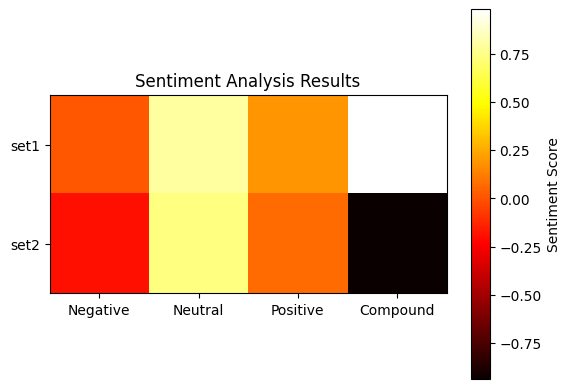

In [ ]:
#Create Heatmap for the results
sentiment_heatmap = np.array([[0.009, 0.8 , 0.192 , 0.981 ],[-0.192 , 0.735, 0.073 , -0.937]])
texts = ['set1', 'set2']
sentiments = ['Negative', 'Neutral', 'Positive', 'Compound']

plt.imshow(sentiment_heatmap, cmap='hot', interpolation='nearest')
plt.colorbar(label='Sentiment Score')
plt.xticks(np.arange(len(sentiments)), sentiments)
plt.yticks(np.arange(len(texts)), texts)
plt.title('Sentiment Analysis Results')
plt.show()